In [21]:
from google.colab import files
from google.colab import autoviz
import numpy as np
import pandas as pd

In [22]:
files.upload()

In [23]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [24]:
! chmod 600 ~/.kaggle/kaggle.json

In [25]:
!kaggle datasets download -d salader/dogs-vs-cats

In [26]:
! unzip /content/dogs-vs-cats.zip

In [27]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization

In [28]:
#generator
train_ = keras.utils.image_dataset_from_directory(directory = '/content/dogs_vs_cats/train',
                                   labels = 'inferred',
                                   label_mode = 'int',
                                   batch_size = 32,
                                   image_size = (256,256))

Found 20000 files belonging to 2 classes.


In [29]:
val_ = keras.utils.image_dataset_from_directory(directory = '/content/dogs_vs_cats/test',
                                   labels = 'inferred',
                                   label_mode = 'int',
                                   batch_size = 32,
                                   image_size = (256,256))

Found 5000 files belonging to 2 classes.


In [30]:
#Normalize
def process(image,label):
  image = tf.cast(image/255.,tf.float32)
  return image,label

train_ = train_.map(process)
val_ = val_.map(process)

In [31]:
model = Sequential()

In [32]:
model.add(Conv2D(32,kernel_size = (3,3),padding = 'valid',activation = 'relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding='valid'))

model.add(Conv2D(64,kernel_size = (3,3),padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding='valid'))

model.add(Conv2D(128,kernel_size = (3,3),padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding='valid'))

model.add(Flatten())

In [33]:
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation = 'sigmoid'))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

history = model.fit(train_,epochs = 11,validation_data = val_)

In [97]:
import cv2
import matplotlib.pyplot as plt

In [98]:
img_test = cv2.imread('/content/train/catt.jpeg')

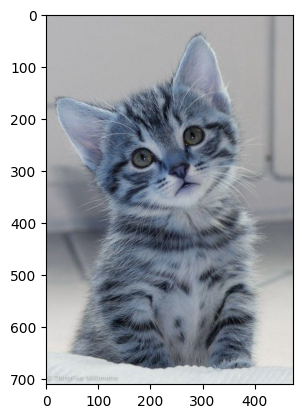

In [99]:
plt.imshow(img_test)

In [100]:
img_test.shape

(710, 474, 3)

In [101]:
img_test = cv2.resize(img_test,(256,256))

In [102]:
test_input = img_test.reshape((1,256,256,3))

In [103]:
pred = model.predict(test_input)
if pred == 0:
  print('Cat')
else:
  print('Dog')

1/1 [==============================] - 0s 22ms/step
Cat


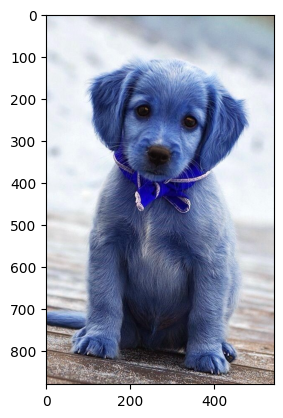

In [104]:
img_test1 = cv2.imread('/content/train/dog_img.jpeg')
plt.imshow(img_test1)

In [106]:
img_test1 = cv2.resize(img_test1,(256,256))
test_input1 = img_test1.reshape((1,256,256,3))
pred = model.predict(test_input1)
if pred == 0:
  print('Cat')
else:
  print('Dog')

1/1 [==============================] - 0s 19ms/step
Dog
